# Bulk flow MCMC

## Make ubf_z plot

In [1]:
import os
import pandas as pd
import numpy as np
data_dir = '/cosma8/data/do012/dc-he4/analysis'



datadict = {}
for lc in range(1728):
    lc00 = f'{lc:04d}'

    filename = f'{data_dir}/lc{lc00}/bf_mcmc_scatter.csv'

    # check if file exists
    if os.path.exists(filename):
        df = pd.read_csv(filename)

        # save to df
        if 'ubf' not in list(datadict.keys()):  # dict.keys() is of type dict_keys
            for key in df.keys():           # load all data
                datadict[key] = df[key]

            length = len(df[key])           # register lightcone number
            datadict['Lightcone'] = np.full(length, lc)
        else:
            for key in df.keys():           # load all data
                datadict[key] = np.concatenate((datadict[key], df[key]))

            length = len(df[key])           # register lightcone number
            datadict['Lightcone'] = np.concatenate((datadict['Lightcone'], np.full(length, lc)))

    else:
        print(lc00, 'bf_mcmc_scatter.csv not found.')
        continue
    
data = pd.DataFrame(datadict)
data

0943 bf_mcmc_scatter.csv not found.
0944 bf_mcmc_scatter.csv not found.
0945 bf_mcmc_scatter.csv not found.
0946 bf_mcmc_scatter.csv not found.
0947 bf_mcmc_scatter.csv not found.
0948 bf_mcmc_scatter.csv not found.
0949 bf_mcmc_scatter.csv not found.
0950 bf_mcmc_scatter.csv not found.
0951 bf_mcmc_scatter.csv not found.
0952 bf_mcmc_scatter.csv not found.
0953 bf_mcmc_scatter.csv not found.
0954 bf_mcmc_scatter.csv not found.
0955 bf_mcmc_scatter.csv not found.
0956 bf_mcmc_scatter.csv not found.
0957 bf_mcmc_scatter.csv not found.
0958 bf_mcmc_scatter.csv not found.
0959 bf_mcmc_scatter.csv not found.
0960 bf_mcmc_scatter.csv not found.
0961 bf_mcmc_scatter.csv not found.
0962 bf_mcmc_scatter.csv not found.
0963 bf_mcmc_scatter.csv not found.
0964 bf_mcmc_scatter.csv not found.
0965 bf_mcmc_scatter.csv not found.
0966 bf_mcmc_scatter.csv not found.
0967 bf_mcmc_scatter.csv not found.
0968 bf_mcmc_scatter.csv not found.
0969 bf_mcmc_scatter.csv not found.
0970 bf_mcmc_scatter.csv not

,scaling_relation,zmax,ubf,ubf_err_lower,ubf_err_upper,vlon,vlon_err_lower,vlon_err_upper,vlat,vlat_err_lower,vlat_err_upper,convergence_time,Lightcone
0,LX-T,0.07,818.659010,239.586912,130.821552,131.989331,63.905606,24.172995,34.927430,16.299167,19.053651,0.000000,0
1,LX-T,0.10,821.416328,234.424651,130.229607,131.992956,53.109645,22.765465,35.721177,16.446403,18.938190,0.000000,0
2,LX-T,0.13,822.390434,240.239138,128.756453,131.897822,61.730426,22.667219,35.260740,16.554894,18.673766,0.000000,0
3,YSZ-T,0.07,386.397435,243.882873,287.341280,24.095461,98.434000,60.477133,41.474777,34.134957,32.019110,92.086703,0
4,YSZ-T,0.10,392.999207,243.519601,270.339619,23.983141,94.037002,58.821308,41.561336,34.532530,31.854866,82.894632,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5650,YSZ-T,0.10,398.280603,266.874174,295.917697,155.940785,66.009265,84.828156,-36.211070,35.016937,38.548824,135.043535,941
5651,YSZ-T,0.13,378.416070,254.474129,304.421452,131.987830,116.726974,62.548449,-35.993392,34.615150,39.652024,149.853544,941
5652,LX-T,0.07,263.902010,185.917911,295.139664,-143.998930,67.671267,77.567310,-4.607253,41.817003,52.460547,0.000000,942
5653,LX-T,0.10,266.041765,185.576711,285.674143,-143.997089,69.693272,73.419116,-4.415261,41.628398,54.148784,0.000000,942


In [2]:
# save data
data.to_csv('../data/analysis_all/bf_mc_all_scatter.csv')

## Read and plot

/cosma/home/do012/dc-he4/.conda/envs/halo-cosma/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


LX-T at zmax=0.07: 421^{+254}_{-174} km/s
LX-T at zmax=0.1: 422^{+252}_{-178} km/s
LX-T at zmax=0.13: 423^{+246}_{-176} km/s
YSZ-T at zmax=0.07: 260^{+171}_{-78} km/s
YSZ-T at zmax=0.1: 262^{+170}_{-80} km/s
YSZ-T at zmax=0.13: 262^{+173}_{-80} km/s


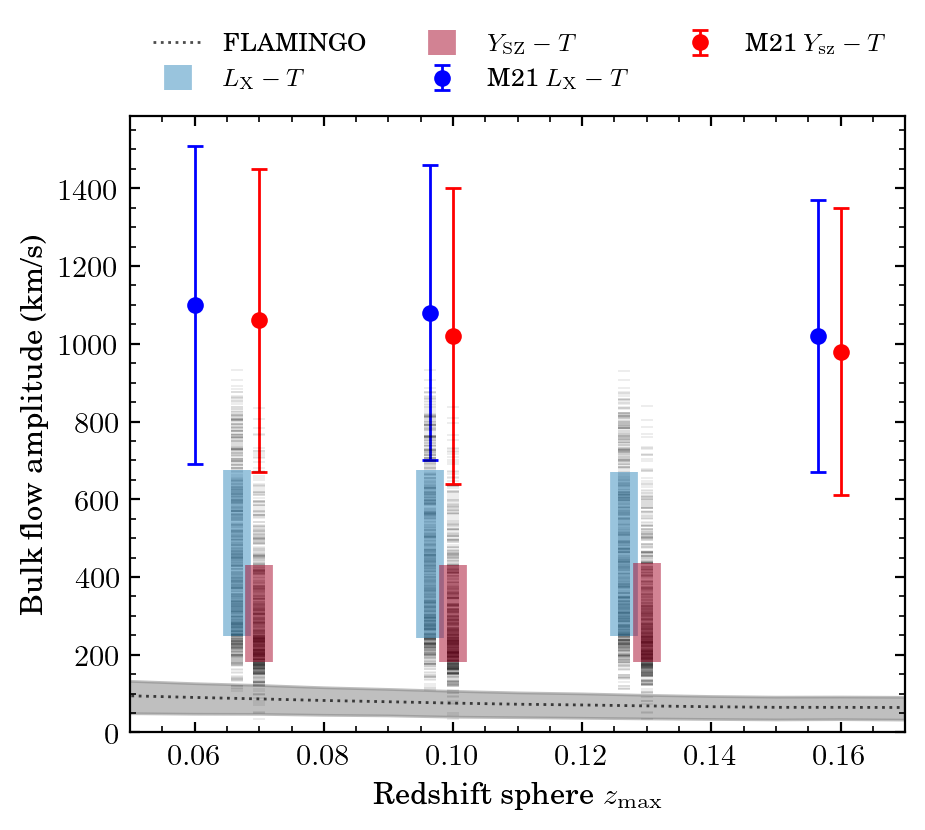

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/cosma/home/do012/dc-he4/anisotropy-flamingo/tools')
import clusterfit as cf
plt.style.use('./nice.mplstyle')

# Assuming 'data' is the DataFrame created from the previous code
# Define the scaling relations and their colors
scaling_relations = ['LX-T', 'YSZ-T', 'M-T']
colors = ['#348ABD', '#A60628', '#467821',]
offsets = [-0.0035, 0, 0.0035]  # Small offsets for each relation

plt.figure(figsize=(5, 4), dpi=200)

import pandas as pd
data = pd.read_csv('../data/analysis_all/bf_mc_all_scatter.csv') # read main bulk flow data


# Plot for each scaling relation
for relation, color, offset in zip(scaling_relations, colors, offsets):
    # Filter data for the current scaling relation
    relation_data = data[data['scaling_relation'] == relation]
    
    # Apply offset to zmax
    zmax_offset = relation_data['zmax'] + offset
    
    # Plot individual data points with error bars
    plt.errorbar(
        x=zmax_offset,
        y=relation_data['ubf'],
        yerr=[relation_data['ubf_err_lower'], relation_data['ubf_err_upper']],
        fmt='_',
        ecolor=color,
        capsize=0,
        elinewidth=0,
        markeredgewidth=0.1,
        markeredgecolor='black',
        markersize=4,
        alpha=0.5,
    )
    
    # Calculate the error range
    for z in relation_data['zmax'].unique():
        z_data = relation_data[relation_data['zmax'] == z]
        upper = np.percentile(z_data['ubf'], 84)
        lower = np.percentile(z_data['ubf'], 16)
        median = np.median(z_data['ubf'].values)

        # Print out the cross region ranges
        print(f'{relation} at zmax={z}: {median:.0f}^{{+{upper - median:.0f}}}_{{-{median - lower:.0f}}} km/s')

        # Plot the cross region as bars
        plt.errorbar(
            x=[z + offset],
            y=[(upper + lower) / 2],
            yerr=[[(upper - lower) / 2], [(upper - lower) / 2]],
            fmt='none',
            ecolor=color,
            #capsize=5,
            #capthick=1,
            elinewidth=10,
            alpha=0.5,
            zorder=10,
            label=f'{cf.latex_relation(relation)}' if z==0.07 else ''
        )

# M21 results
plt.errorbar(x=np.array([0.06 - offsets[0], 0.1, 0.16]) + offsets[0], 
             y=[1100, 1080, 1020], 
             yerr=[410, 380, 350], 
             label='M21 $L_\mathrm{X}-T$', 
             fmt='o', 
             color='blue', 
             capsize=3,
             capthick=1
             )
plt.errorbar(x=[0.07, 0.1, 0.16], 
             y=[1060, 1020, 980], 
             yerr=[390, 380, 370], 
             label='M21 $Y_\mathrm{sz}-T$', 
             fmt='o', 
             color='red', 
             capsize=3,
             capthick=1
             )

# Plot the underlying truth
df = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/analysis_all/bf_truth.csv')
plt.fill_between(x=df['z'].values, 
                 y1=(df['ubf']-df['ubf_low_err']).values,
                 y2=(df['ubf_up_err']+df['ubf']).values,
                 color='grey',
                 alpha=0.5,
                 zorder=0)
plt.plot(df['z'].values, 
         df['ubf'].values, 
         color='black', 
         alpha=0.7, 
         zorder=0,
         label='FLAMINGO'
         )

plt.xlim(0.05, 0.17)
plt.ylim(bottom=0)
plt.xlabel('Redshift sphere $z_\mathrm{max}$')
plt.ylabel('Bulk flow amplitude (km/s)')
plt.legend(fontsize=9, bbox_to_anchor=(0.5, 1), loc='lower center', ncol=3)

plt.savefig('./to_paper/bulk_flow_scatter.png', bbox_inches='tight')
plt.show()

## Contours

In [5]:
import pandas as pd
data = pd.read_csv('../data/analysis_all/bf_mc_all_scatter.csv') # read main bulk flow data

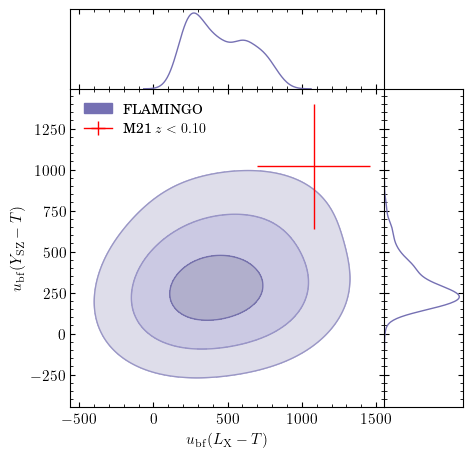

In [2]:
# ---------------------------------------------------------------------------- #
#                                Plot for print                                #
# ---------------------------------------------------------------------------- #ß
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('./nice.mplstyle')

contour_color='#7570b3'

zmax = 0.10
xrelation = 'LX-T'
xmask = (data['scaling_relation'] == xrelation) & (data['zmax'] == zmax)
xdata = data[xmask]['ubf']
yrelation = 'YSZ-T'
ymask = (data['scaling_relation'] == yrelation) & (data['zmax'] == zmax)
ydata = data[ymask]['ubf']



# Create the 2D KDE plot
g = sns.JointGrid(x=xdata.values,
                  y=ydata.values,
                  space=0,
                  ratio=4,
                  # marginal_ticks=True,
                  height=4.5,
                  # dpi=300
                  )
g.plot_joint(sns.kdeplot,  # contours
             fill=False, 
             levels=(0.011, 0.14, 0.61, 1.),
             bw_adjust=3,
             zorder=1,
             color=contour_color,
             # cut=2
             )
g.plot_joint(sns.kdeplot,  # filled contours
             fill=True, 
             levels=(0.011, 0.14, 0.61, 1.),
             bw_adjust=3,
             alpha=0.5,
             zorder=2,
             color=contour_color,
             # cut=2
             )
g.plot_marginals(sns.kdeplot,
                 fill=False,
                 color=contour_color,
                 )

# g.ax_marg_x.set_yscale('log')
# g.ax_marg_y.set_xscale('log')

# M21 results
x_point = 1080
y_point = 1020
# g.refline(x=x_point, y=y_point, linestyle='dashdot', color=contour_color, zorder=3)
erb = g.ax_joint.errorbar(x=1080, 
                    y=1020,
                    xerr=380,
                    yerr=380, 
                    fmt='',
                    color='red', 
                    label='M21 $z<0.10$', 
                    zorder=10)
# g.ax_joint.errorbar(x=75, y=75,
#                     xerr=[[36], [30]],
#                     yerr=[[36], [30]],
#                     fmt='',
#                     color='blue', 
#                     label='Truth $z<0.10$', 
#                     zorder=10)

# Also add the box for the marginal plots
g.ax_marg_x.spines['top'].set_visible(True)
g.ax_marg_x.spines['right'].set_visible(True)
g.ax_marg_x.spines['left'].set_visible(True)
g.ax_marg_x.spines['bottom'].set_visible(True)

g.ax_marg_y.spines['top'].set_visible(True)
g.ax_marg_y.spines['right'].set_visible(True)
g.ax_marg_y.spines['left'].set_visible(True)
g.ax_marg_y.spines['bottom'].set_visible(True)

# matplotlib doesn't detect the contour correctly, adding it manually
import matplotlib.patches as mpatches
contour = mpatches.Patch(color=contour_color, label='FLAMINGO')

# Add to the legend
g.ax_joint.legend(handles=[contour, erb], loc='upper left', fontsize=10)

g.set_axis_labels(xlabel='$u_\mathrm{bf} (L_\mathrm{X}-T)$', ylabel='$u_\mathrm{bf} (Y_\mathrm{SZ}-T)$')
# plt.savefig('./to_paper/bfmc_hist_LTYTMT.pdf', bbox_inches='tight')
# Show the plot
plt.show()

## p-value and significance

### 1-dimensional

In [ ]:
import math
from scipy.special import erfinv
import numpy as np
# Lx-T z<0.10
nsig1 = (1080 - 315) / (260**2 + 380**2)**0.5
print(nsig1)
p1 = 1 - math.erf(nsig1/np.sqrt(2))
print(p1)

# Ysz-T z<0.10
nsig2 = (1020 - 164) / (119**2 + 380**2)**0.5
print(nsig2)
p2 = 1 - math.erf(nsig2/np.sqrt(2))
print(p2)

# Joint value
p = p1*p2
print(p)
nsig = np.sqrt(2) * erfinv(1 - p)
print(nsig)

1.6614738285687403
0.09661832091281275
2.149688715113693
0.03157984568353245
0.0030511916646286425
2.9625329339178634


In [8]:
import math
from scipy.special import erfinv
import numpy as np
# Lx-T z<0.06
nsig1 = (1100 - 315) / (262**2 + 410**2)**0.5
print(nsig1)
p1 = 1 - math.erf(nsig1/np.sqrt(2))
print(p1)

# Ysz-T z<0.07
nsig2 = (1060 - 164) / (119**2 + 390**2)**0.5
print(nsig2)
p2 = 1 - math.erf(nsig2/np.sqrt(2))
print(p2)

# Joint value
p = p1*p2
print(p)
nsig = np.sqrt(2) * erfinv(1 - p)
print(nsig)

1.6133558426410304
0.1066672207887962
2.1974186973581684
0.027990557146471473
0.00298567493914409
2.969208955824517


### EVS

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import genpareto
from scipy.special import erfinv
import math
import matplotlib.pyplot as plt



# Load the data
data = pd.read_csv('../data/analysis_all/bf_mc_all_scatter.csv')

# Filter data for zmax = 0.10
zmask = data['zmax'] == 0.10
uLT = data[zmask][data['scaling_relation'] == 'LX-T'][['ubf', 'Lightcone']]
uYT = data[zmask][data['scaling_relation'] == 'YSZ-T'][['ubf', 'Lightcone']]

# Merge the data on Lightcone
u = pd.merge(left=uLT, right=uYT, on='Lightcone', suffixes=('LT', 'YT'))

# Calculate the projection values
x = (u['ubfLT'].values + u['ubfYT'].values) / 2

# Define the target value
target_value = 1050

/tmp/ipykernel_3264198/539190981.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  uLT = data[zmask][data['scaling_relation'] == 'LX-T'][['ubf', 'Lightcone']]
/tmp/ipykernel_3264198/539190981.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  uYT = data[zmask][data['scaling_relation'] == 'YSZ-T'][['ubf', 'Lightcone']]


Number of std deviation: p=1.0936577730435992e-05, (4.397775974341144sigma)
EVT p-value: p=0.0, (infsigma)


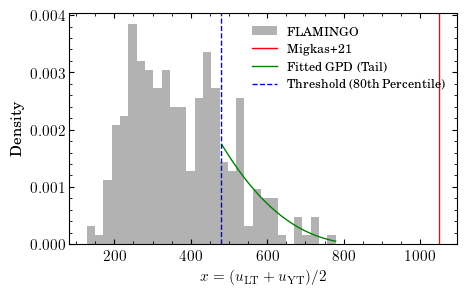

In [8]:
# Set percentile for EVS threshold
percentile = 80

def calculate_sigma_p_value(proj, target_value):
    median = np.median(proj)
    sigma_84th = np.percentile(proj, 84)
    sigma = sigma_84th - median
    sigma_deviation = np.abs((target_value - median) / sigma)
    p_value_sigma = 1 - math.erf(sigma_deviation / np.sqrt(2))
    return sigma_deviation, p_value_sigma

# Function to calculate EVT p-value
def calculate_evt_p_value(proj, target_value, percentile):
    # Determine the threshold
    threshold = np.percentile(proj, percentile)
    exceedances = proj[proj > threshold] - threshold  # Tail data

    # Fit GPD to the tail data
    params = genpareto.fit(exceedances)
    shape, loc, scale = params

    # Tail survival probability (proportion of data in the tail)
    tail_prob = np.sum(proj >= threshold) / len(proj)

    if target_value > threshold:
        # Conditional probability adjusted to match at the threshold
        p_value_evt = (1 - genpareto.cdf(target_value - threshold, *params)) * tail_prob
    else:
        # Empirical CDF for the bulk region
        p_value_evt = np.sum(proj >= target_value) / len(proj)

    # Transform to sigma (Gaussian equivalent deviation)
    sigma_evt = np.sqrt(2) * erfinv(1 - p_value_evt)

    return p_value_evt, sigma_evt

# Number of sigma deviation
sigma_deviation, p_value_sigma = calculate_sigma_p_value(x, target_value)
print(f"Number of std deviation: p={p_value_sigma}, ({sigma_deviation}sigma)")

# Calculate EVT p-value and sigma deviation
p_value_evt, sigma_evt = calculate_evt_p_value(x, target_value, percentile=percentile)
print(f"EVT p-value: p={p_value_evt}, ({sigma_evt}sigma)")

# Plotting results
plt.figure(figsize=(5, 3))
plt.hist(x, bins=30, density=True, alpha=0.6, color='gray', label='FLAMINGO')

# Fit a GPD distribution
threshold = np.percentile(x, percentile)
exceedances = x[x > threshold] - threshold
params = genpareto.fit(exceedances)
shape, loc, scale = params

# Plot fitted distribution
x_vals = np.linspace(threshold, x.max(), 100)
gpd_pdf = genpareto.pdf(x_vals - threshold, shape, loc, scale) * (1 - percentile / 100)
plt.axvline(target_value, color='red', linestyle='-', label='Migkas+21')
plt.plot(x_vals[1:], gpd_pdf[1:], color='g', label='Fitted GPD (Tail)')
plt.axvline(threshold, color='blue', linestyle='--', label=f'Threshold ({percentile}th Percentile)')

# Annotate the plot
plt.annotate(f'p={p_value_evt:.2e}', 
             xy=(target_value, 0.2), xycoords='data',
             xytext=(target_value - 1, 0.2), textcoords='data',
             arrowprops=dict(arrowstyle='->,head_width=.15', color='red'),
             horizontalalignment='right', verticalalignment='center', color='red')

plt.xlabel('$x=(u_{\\mathrm{LT}} + u_{\\mathrm{YT}})/2$')
plt.ylabel('Density')
plt.legend(fontsize=9)

# plt.savefig(f'./to_paper/evs_mcmc_bulk_flow.pdf', bbox_inches='tight')   # save the figure
plt.show()